In [150]:
import networkx as nx
import math
import random
import numpy as np
import copy
from datetime import datetime
from matplotlib import pyplot as plt

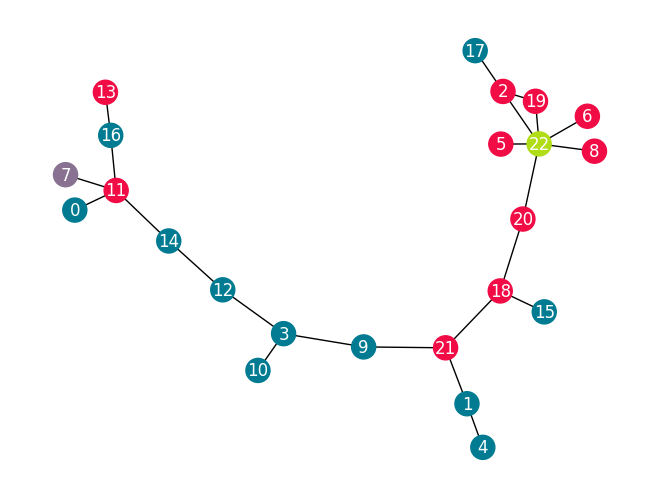

In [142]:
num_nodes = 23
G = nx.connected_watts_strogatz_graph(num_nodes, 3, 1, 30)

obstacle_upper_bound = num_nodes//2
num_obstacles = random.randrange(1, obstacle_upper_bound + 1)
obstacles = random.sample(range(num_nodes), num_obstacles)
obstacles_start = copy.deepcopy(obstacles)

graph_map = {node: node in obstacles for node in G}

potential_robot_positions = [node for node in graph_map if not graph_map[node]]
robot_goal_positions = random.sample(potential_robot_positions, k=2)
robot_pos, goal_pos = robot_goal_positions[0], robot_goal_positions[1]

# Draw the graph with individual node colors
colors = ['xkcd:pinkish red' if node in obstacles else 'xkcd:ocean' for node in graph_map]
colors[robot_pos] = 'xkcd:greyish purple'
colors[goal_pos] = 'xkcd:yellowish green'
nx.draw(G, with_labels=True, node_color=colors, font_color='white')

In [143]:
def move_obstacle(g, node, start_pos, goal_pos, obstacles, stuck_num):    
    ## segFault
    if stuck_num == 50:
        return False, node
    
    possible_moves = sorted([node for node in g[node] if node != goal_pos and node != robot_pos])
    # #recursion
    if len(possible_moves) == 0:
        return False, node
    
    chosen_move = random.sample(possible_moves, k=1)[0]
    if(chosen_move in obstacles):
        #recursion
        return move_obstacle(g, chosen_move, start_pos, goal_pos, obstacles, stuck_num+1)
        
    
    obstacles.remove(node)
    obstacles.append(chosen_move)

    # print(f'Obstacle moves: {node} -> {chosen_move}')
    return True, chosen_move

In [144]:
def move_robot(g, u, obstacles):
    neighbors = [node for node in g[u] if node not in obstacles]
    if len(neighbors) == 0:
        return u

    chosen_move = random.sample(neighbors, k=1)[0]
    # print(f'Robot moves: {u} -> {chosen_move}')
    return chosen_move

In [175]:
def find_path(g, start_pos, goal_pos, obstacles, num_iterations):
    start_time = datetime.now()
    robot_move_prob = 0.8
    min_length = float('inf')
    min_iteration = float('inf')
    obstacles_start = copy.deepcopy(obstacles)

    best_moves = []
    length_per_iteration = []
    
    for iteration in range(num_iterations):
        obstacles = copy.deepcopy(obstacles_start)
        u = start_pos
        robot_moves = 0
        obstacle_moves = 0
        moves = []
        while (u != goal_pos):
            if (random.random() > robot_move_prob):
                next_node = move_robot(g, u, obstacles)
                if next_node == u:
                    u = start_pos
                    robot_moves = 0
                    continue
                moves.append(('r', f'{u}->{next_node}'))
                u = next_node
                robot_moves += 1
                
            else:
                random_obstacle = random.sample(obstacles, k=1)[0]
                # obstacle_moves += 1 if move_obstacle(g, random_obstacle, start_pos, goal_pos, obstacles, stuck_num=0) else 0
                obstacle_moved, moved_to = move_obstacle(g, random_obstacle, start_pos, goal_pos, obstacles, stuck_num=0)
                if obstacle_moved:
                    moves.append(('o', f'{random_obstacle}->{moved_to}'))
                    obstacle_moves += 1
    
        num_of_steps = robot_moves + obstacle_moves
        length_per_iteration.append(num_of_steps)
        print(f'Path length for iteration {iteration+1}: {num_of_steps}')
        # print(f'Best path of iteration {iteration}: {moves}')
        if num_of_steps < min_length:
            min_length = num_of_steps
            min_iteration = iteration + 1
            best_moves = copy.deepcopy(moves)

    end_time = datetime.now()
    print(f'The minimum length of {min_length} was found in iteration {min_iteration}')
    print(f'Time it took to finish the search: {(end_time - start_time).total_seconds()}')
    print('Best path of all iterations: ')
    for i in range(len(best_moves)):
        print(best_moves[i])

    plt.plot(range(1, num_iterations+1), length_per_iteration, color='xkcd:ruby', label='Best Weight')
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()
    # plt.xticks(np.linspace(1, 100, 10))

Path length for iteration 1: 1882
Path length for iteration 2: 1815
Path length for iteration 3: 2649
Path length for iteration 4: 409
Path length for iteration 5: 7204
Path length for iteration 6: 16683
Path length for iteration 7: 3757
Path length for iteration 8: 741
Path length for iteration 9: 18565
Path length for iteration 10: 2824
Path length for iteration 11: 19056
Path length for iteration 12: 643
Path length for iteration 13: 1792
Path length for iteration 14: 7250
Path length for iteration 15: 2621
Path length for iteration 16: 15554
Path length for iteration 17: 3533
Path length for iteration 18: 1245
Path length for iteration 19: 12985
Path length for iteration 20: 5436
Path length for iteration 21: 3721
Path length for iteration 22: 4419
Path length for iteration 23: 12034
Path length for iteration 24: 5209
Path length for iteration 25: 763
Path length for iteration 26: 4983
Path length for iteration 27: 4873
Path length for iteration 28: 4277
Path length for iteration 2

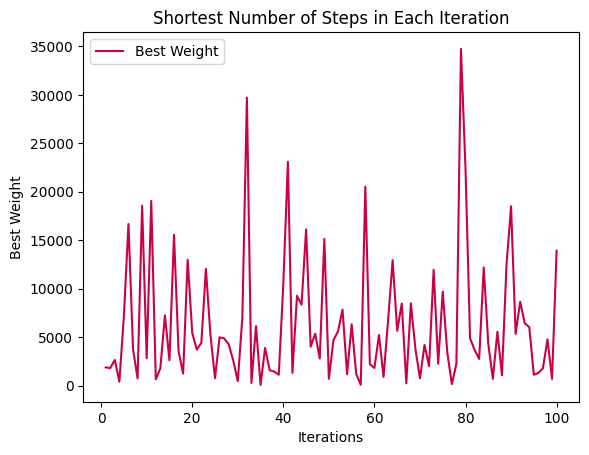

In [176]:
find_path(G, robot_pos, goal_pos, obstacles, num_iterations=100)